In [248]:
import os
import numpy as np
import pandas as pd
import tempfile

import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as pplt
import matplotlib.pyplot as plt
from pandapower.plotting.plotly import pf_res_plotly
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl

This pandapower network includes the following parameter tables:
   - bus (20 elements)
   - load (118 elements)
   - switch (8 elements)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (7 elements)
   - bus_geodata (20 elements)


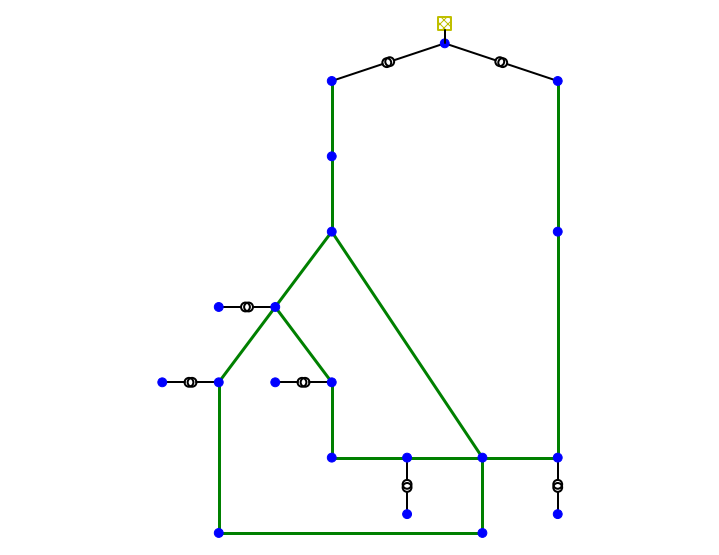

In [249]:
#creating our net
net = nw.create_cigre_network_mv()
pp.create_bus(net, name='Bus CS 14', vn_kv=0.4, type='b', geodata=((10,3.5)))
pp.create_bus(net, name='Bus CS 11', vn_kv=0.4, type='b', geodata=((2.5,7)))
pp.create_bus(net, name='Bus CS 5', vn_kv=0.4, type='b', geodata=((-0.5,7)))
pp.create_bus(net, name='Bus CS 4', vn_kv=0.4, type='b', geodata=((1,9)))
pp.create_bus(net, name='Bus CS 9', vn_kv=0.4, type='b', geodata=((6,3.5)))


pp.create_transformer(net, hv_bus=14, lv_bus= pp.get_element_index(net,'bus', 'Bus CS 14'), name='CS 14', std_type= '0.63 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=11, lv_bus=pp.get_element_index(net, 'bus', 'Bus CS 11'),  name='CS 11',std_type= '0.4 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=5, lv_bus=pp.get_element_index (net, 'bus', 'Bus CS 5'),   name='CS 5', std_type= '0.4 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=4, lv_bus=pp.get_element_index (net, 'bus', 'Bus CS 4'),   name='CS 4', std_type= '0.25 MVA 20/0.4 kV')
pp.create_transformer(net, hv_bus=9, lv_bus=pp.get_element_index (net, 'bus', 'Bus CS 9'),   name='CS 9', std_type= '0.25 MVA 20/0.4 kV')

#ev_loads
#adding ev's
for i in range (1,41):
    l=str(i)
    pp.create_load(net, bus=15, p_mw=0.0066, q_mvar=0, name="Vehicle "+l)

#Bus CS 11 (0.4 MVA) - trafo id: 3
for i in range (41,61):
    l=str(i)
    pp.create_load(net, bus=16, p_mw=0.0066, q_mvar=0, name="Vehicle "+l)

#Bus CS 5 (0.4 MVA) - trafo id: 4
for i in range (61,81):
    l=str(i)
    pp.create_load(net, bus=17, p_mw=0.0066, q_mvar=0, name="Vehicle "+l)

#Bus CS 4 (0.25 MVA) - trafo id: 5
for i in range (81,91):
    l=str(i)
    pp.create_load(net, bus=18, p_mw=0.0066, q_mvar=0, name="Vehicle "+l)

#Bus CS 9 (0.25 MVA)- trafo id: 6
for i in range (91,101):
    l=str(i)
    pp.create_load(net, bus=19, p_mw=0.0066, q_mvar=0, name="Vehicle "+l)
print(net)

ax = pplt.simple_plot(net, show_plot = False)
clc = pplt.create_line_collection(net, color ="g", linewidth = 3.,use_bus_geodata=(True))
pplt.draw_collections([clc], ax=ax)
plt.show()
#pp.runpp(net)

In [250]:
#importing the active and reactive power of loads from excel
df_active = pd.read_csv('active_power_time_series_ev_load.csv')
df_reactive = pd.read_csv('reactive_power_time_series_ev_load.csv')
# create the data source from
ds_active = DFData(df_active)
ds_reactive = DFData(df_reactive)

In [251]:
df_active

,Load R1,Load R3,Load R4,Load R5,Load R6,Load R8,Load R10,Load R11,Load R12,Load R14,...,Vehicle 91,Vehicle 92,Vehicle 93,Vehicle 94,Vehicle 95,Vehicle 96,Vehicle 97,Vehicle 98,Vehicle 99,Vehicle 100
0,4.241053,0.078194,0.122092,0.205773,0.155016,0.165991,0.134439,0.093284,4.241053,0.058988,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000
1,4.082791,0.075276,0.117536,0.198095,0.149231,0.159796,0.129422,0.089803,4.082791,0.056787,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000
2,3.919174,0.072259,0.112826,0.190156,0.143251,0.153392,0.124235,0.086204,3.919174,0.054511,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000
3,3.918352,0.072244,0.112802,0.190116,0.143221,0.153360,0.124209,0.086186,3.918352,0.054500,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000
4,3.813214,0.070306,0.109776,0.185015,0.139378,0.149245,0.120876,0.083873,3.813214,0.053038,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000
5,3.895276,0.071819,0.112138,0.188996,0.142377,0.152457,0.123478,0.085678,3.895276,0.054179,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000
6,4.092852,0.075461,0.117826,0.198583,0.149599,0.160190,0.129741,0.090024,4.092852,0.056927,...,0.0000,0.0000,0,0.0000,0.0066,0.0000,0.0066,0,0.0000,0.0000
7,4.635395,0.085465,0.133445,0.224907,0.169430,0.181425,0.146939,0.101958,4.635395,0.064473,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0066,0,0.0000,0.0000
8,6.507081,0.119973,0.187327,0.315720,0.237842,0.254681,0.206270,0.143126,6.507081,0.090506,...,0.0000,0.0000,0,0.0000,0.0000,0.0000,0.0000,0,0.0066,0.0000
9,8.141067,0.150100,0.234367,0.395000,0.297566,0.318633,0.258067,0.179067,8.141067,0.113233,...,0.0000,0.0000,0,0.0000,0.0000,0.0066,0.0000,0,0.0000,0.0000


In [252]:
def timeseries_example(output_dir):
    
    #defing the time step
    n_timesteps = 24
    
    # 3. create controllers (to control P values of the load) ds_p is for active power and ds_q for reactive power
    create_controllers(net, ds_active, ds_reactive)

    # time steps to be calculated. Could also be a list with non-consecutive time steps
    time_steps = range(0, n_timesteps)

    # 4. the output writer with the desired results to be stored to files.
    ow = create_output_writer(net, time_steps, output_dir=output_dir)

    # 5. the main time series function
    run_timeseries(net, time_steps) 

In [253]:
net.load.name

0          Load R1
1          Load R3
2          Load R4
3          Load R5
4          Load R6
          ...     
113     Vehicle 96
114     Vehicle 97
115     Vehicle 98
116     Vehicle 99
117    Vehicle 100
Name: name, Length: 118, dtype: object

In [254]:
load_index=net.load.index
load_name=net.load.name
def create_controllers(net,ds_active,ds_reactive):
    for i in range(len(load_index)):
        ConstControl(net, element='load', variable='p_mw', element_index=load_index[i],
                 data_source=ds_active, profile_name=load_name[i])
        ConstControl(net, element='load', variable='q_mvar', element_index=load_index[i],
                 data_source=ds_reactive, profile_name=load_name[i])

In [255]:
def create_output_writer(net, time_steps, output_dir):
    ow = OutputWriter(net, time_steps, output_path=output_dir, output_file_type=".xlsx", log_variables=list())
    # these variables are saved to the harddisk after / during the time series loop
    ow.log_variable('res_load', 'p_mw')
    ow.log_variable('res_bus', 'vm_pu')
    ow.log_variable('res_line', 'loading_percent')
    ow.log_variable('res_line', 'i_ka')
    ow.log_variable('res_trafo','loading_percent')
    return ow

In [256]:
output_dir = os.path.join(tempfile.gettempdir(), "time_series_ev")
print("Results can be found in your local temp folder: {}".format(output_dir))
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
timeseries_example(output_dir)

Results can be found in your local temp folder: C:\Users\jithu\AppData\Local\Temp\time_series_ev



100%|██████████| 24/24 [00:09<00:00,  2.58it/s]


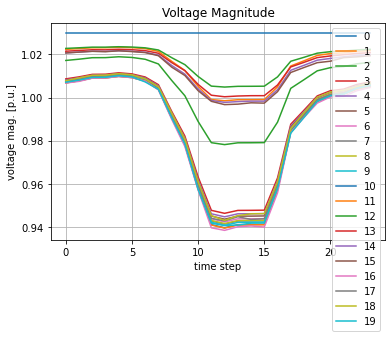

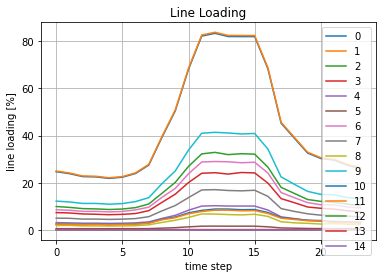

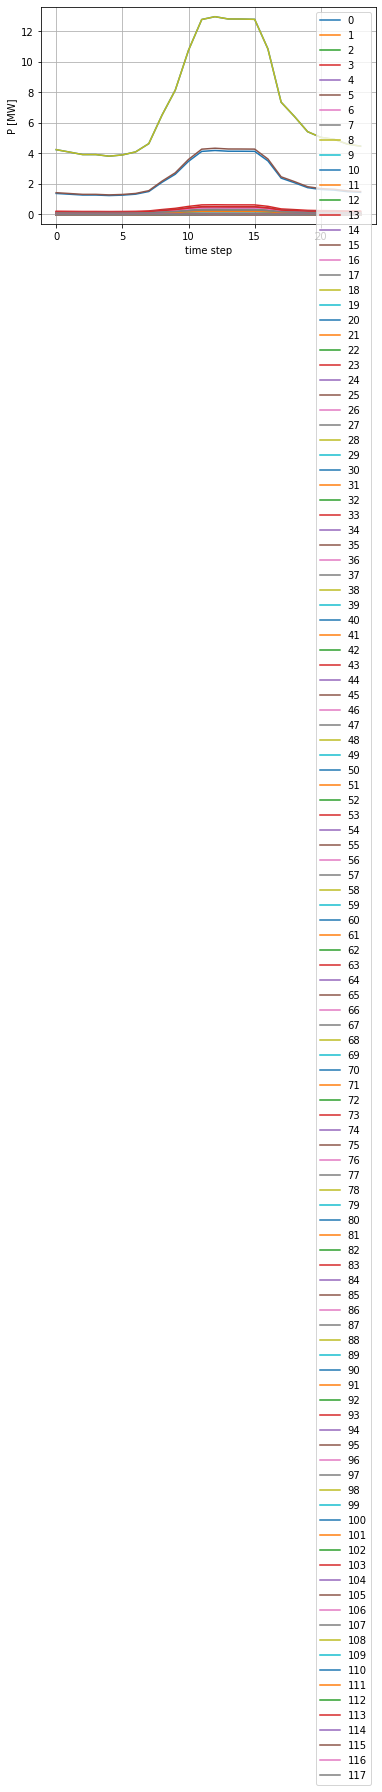

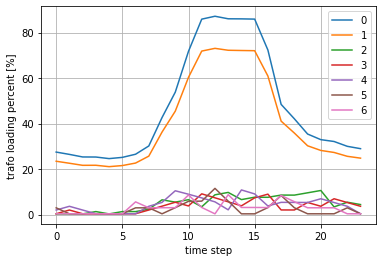

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline  

# voltage results
vm_pu_file = os.path.join(output_dir, "res_bus", "vm_pu.xlsx")
vm_pu = pd.read_excel(vm_pu_file, index_col=0)
vm_pu.plot(label="vm_pu")
plt.xlabel("time step")
plt.ylabel("voltage mag. [p.u.]")
plt.title("Voltage Magnitude")
plt.grid()
plt.show()

# line loading results
ll_file = os.path.join(output_dir, "res_line", "loading_percent.xlsx")
line_loading = pd.read_excel(ll_file, index_col=0)
line_loading.plot(label="line_loading")
plt.xlabel("time step")
plt.ylabel("line loading [%]")
plt.title("Line Loading")
plt.grid()
plt.show()

# load results
load_file = os.path.join(output_dir, "res_load", "p_mw.xlsx")
load = pd.read_excel(load_file, index_col=0)
load.plot(label="load")
plt.xlabel("time step")
plt.ylabel("P [MW]")
plt.grid()
plt.show()

#trafo results
load_file = os.path.join(output_dir, "res_trafo", "loading_percent.xlsx")
load = pd.read_excel(load_file, index_col=0)
load.plot(label="trafo")
plt.xlabel("time step")
plt.ylabel("trafo loading percent [%]")
plt.grid()
plt.show()



In [247]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Load R1,1,4.241053,3.044662,0.0,0.0,15.300,1.0,True,wye
1,Load R3,3,0.276450,0.069285,0.0,0.0,0.285,1.0,True,wye
2,Load R4,4,0.431650,0.108182,0.0,0.0,0.445,1.0,True,wye
3,Load R5,5,0.727500,0.182329,0.0,0.0,0.750,1.0,True,wye
4,Load R6,6,0.548050,0.137354,0.0,0.0,0.565,1.0,True,wye
...,...,...,...,...,...,...,...,...,...,...
361,Vehicle 344,19,0.006600,0.000000,0.0,0.0,NaN,1.0,True,wye
362,Vehicle 345,19,0.006600,0.000000,0.0,0.0,NaN,1.0,True,wye
363,Vehicle 346,19,0.006600,0.000000,0.0,0.0,NaN,1.0,True,wye
364,Vehicle 347,19,0.006600,0.000000,0.0,0.0,NaN,1.0,True,wye


In [234]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.030000,0.000000,-13.640954,-3.465966
1,1.021755,-1.885058,5.911347,1.381709
2,1.016284,-2.216792,0.000000,0.000000
3,1.007222,-2.722239,0.149490,0.062240
4,1.006751,-2.750450,0.128617,0.032235
5,1.006429,-2.769865,0.216770,0.054328
6,1.006057,-2.792991,0.163300,0.040927
7,1.005777,-2.796793,0.022794,0.014127
8,1.005818,-2.792707,0.174861,0.043824
9,1.005558,-2.803901,0.170958,0.105950
